In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
import numpy as np
from qiskit.tools.monitor import job_monitor
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

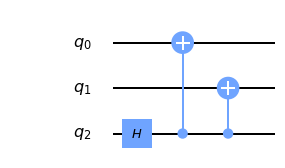

In [3]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(2)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(2, 0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(2, 1)
#circ.cx(1, 2)

circ.draw()



[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


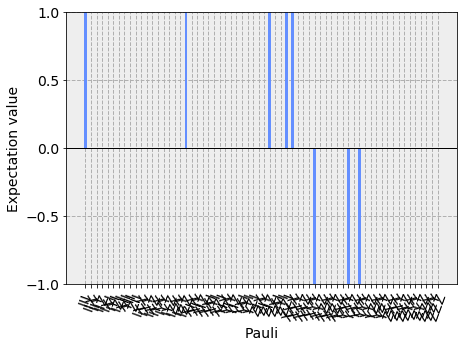

In [14]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
# Create a Quantum Program for execution 
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)
#plot_state_city(outputstate)
##plot_state_hinton(outputstate)
plot_state_qsphere(outputstate)
plot_state_paulivec(outputstate)
#plot_bloch_multivector(outputstate)

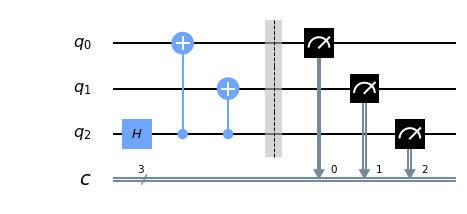

In [5]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3),range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ+meas

#drawing the circuit
qc.draw()

{'000': 546, '111': 478}


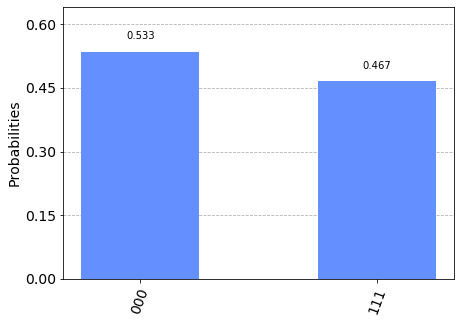

In [7]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)
plot_histogram(counts)

Job Status: job has successfully run


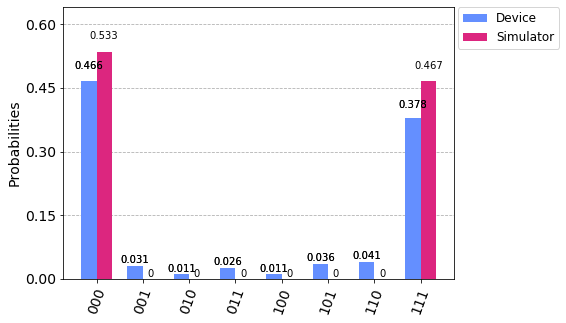

In [10]:
backend = provider.get_backend('ibmq_london')
job_exp = execute(qc, backend=backend)
job_monitor(job_exp)

result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

In [12]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>